In [36]:
from scipy import stats
import queueing
import pandas as pd
import numpy as np
import datetime, time

In [47]:
inter_arrival_times_in_seconds = 3600/(8 - 1)
avarage_services_times_in_seconds = 3600/(9 - 1)

In [48]:
print("inter_arrival_times_in_seconds:",inter_arrival_times_in_seconds)
print("avarage_services_times_in_seconds:",avarage_services_times_in_seconds)

inter_arrival_times_in_seconds: 514.2857142857143
avarage_services_times_in_seconds: 450.0


In [49]:
arrivals_per_second = 8/3600
services_per_second = 9/3600

In [51]:
print("arrivals_per_second:",arrivals_per_second)
print("services_per_second:",services_per_second)

arrivals_per_second: 0.0022222222222222222
services_per_second: 0.0025


In [52]:
A = queueing.arrival_process("M", stats.poisson(mu = inter_arrival_times_in_seconds))
S = queueing.service_process("M", stats.expon(scale = avarage_services_times_in_seconds))
c = 1

In [53]:
q = queueing.queue(A, S, c)
sim = queueing.simulation(q)

In [54]:
%%time
sim.run(10000)


*** Simulation finished in 110 days, 18:22:46
Wall time: 1.15 s


In [55]:
print('Average IAT:', np.sum(sim.log["IAT"])/sim.log["c"][-1])
print('Average ST:', np.sum(sim.log["ST"])/sim.log["c"][-1])

Average IAT: 514.0233
Average ST: 442.99330409000135


In [56]:
# https://www.youtube.com/watch?v=nDXD8oVelo4
print('Total number of customers:', sim.log["c"][-1])
print('Total waiting time:', np.sum(sim.log["TCWQ"]))
print('Average waiting time of all customers:', np.sum(sim.log["TCWQ"])/sim.log["c"][-1])
print('Average waiting time of customers that waited:', np.sum(sim.log["TCWQ"])/np.sum(np.array(sim.log["TCWQ"])!=0))
print('Probability that customers are waiting:', np.sum(np.array(sim.log["TCWQ"])!=0)/sim.log["c"][-1])
print('Total service time:', np.sum(sim.log["ST"]))
print('Average service time:', np.sum(sim.log["ST"])/sim.log["c"][-1])
print('Average time between arrivals:', np.sum(sim.log["IAT"])/(sim.log["c"][-1]-1))
print('Average total time a customer spent in the system:', np.sum(sim.log["TCSS"])/sim.log["c"][-1])
print('Probability of idle server:', np.sum(sim.log["ITS"])/sim.log["TSE"][-1])
print('Server utilisation (%):', (np.sum(sim.log["ITS"])/np.sum(sim.log["TCSS"])/sim.log["c"][-1])*100)


Total number of customers: 10000
Total waiting time: 0.0
Average waiting time of all customers: 0.0
Average waiting time of customers that waited: nan
Probability that customers are waiting: 0.0
Total service time: 4429933.040900013
Average service time: 442.99330409000135
Average time between arrivals: 514.0747074707471
Average total time a customer spent in the system: 442.9933040889263
Probability of idle server: 0.0
Server utilisation (%): 0.0


c:\users\mrv\appdata\local\continuum\miniconda3\envs\openclsim\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [46]:
# c = customer
# IAT = inter arrival time
# ST = service time
# AT = now + IAT
# TSB = time service begins
# TCWQ = time customer waits in the queue
# TSE = time service ends
# TCSS = time customer spends in the system
# ITS = idle time of the server

sim.return_log()

,c,IAT,ST,AT,TSB,TCWQ,TSE,TCSS,ITS
0,1,509,142.884485,5.090000e+02,5.090000e+02,0.0,6.518845e+02,142.884485,0.0
1,2,566,138.175661,1.217884e+03,1.217884e+03,0.0,1.356060e+03,138.175661,0.0
2,3,476,39.938228,1.832060e+03,1.832060e+03,0.0,1.871998e+03,39.938228,0.0
3,4,535,293.987793,2.406998e+03,2.406998e+03,0.0,2.700986e+03,293.987793,0.0
4,5,498,991.110963,3.198986e+03,3.198986e+03,0.0,4.190097e+03,991.110963,0.0
5,6,537,346.100269,4.727097e+03,4.727097e+03,0.0,5.073197e+03,346.100269,0.0
6,7,502,598.226455,5.575197e+03,5.575197e+03,0.0,6.173424e+03,598.226455,0.0
7,8,528,426.174079,6.701424e+03,6.701424e+03,0.0,7.127598e+03,426.174079,0.0
8,9,520,214.976637,7.647598e+03,7.647598e+03,0.0,7.862575e+03,214.976637,0.0
9,10,487,311.718982,8.349575e+03,8.349575e+03,0.0,8.661294e+03,311.718982,0.0


In [35]:
print('Avarage number of customers in the system:',sim.log["c"][-1]/sim.log["TSE"][-1])

Avarage number of customers in the system: 200.15658516803944


(array([2318., 4899., 5923., 5784., 5489., 4804., 4339., 3322., 2914.,
        2272., 1809., 1401., 1093.,  919.,  671.,  410.,  357.,  341.,
         229.,  231.,   92.,   79.,   99.,   54.,   27.,   38.,   10.,
          20.,    0.,    0.,   11.,   12.,    0.,    0.,    0.,   14.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   19.]),
 array([5.19336693e-03, 3.77329445e-01, 7.49465522e-01, 1.12160160e+00,
        1.49373768e+00, 1.86587376e+00, 2.23800983e+00, 2.61014591e+00,
        2.98228199e+00, 3.35441807e+00, 3.72655414e+00, 4.09869022e+00,
        4.47082630e+00, 4.84296238e+00, 5.21509845e+00, 5.58723453e+00,
        5.95937061e+00, 6.33150669e+00, 6.70364276e+00, 7.07577884e+00,
        7.44791492e+00, 7.82005100e+00, 8.19218708e+00, 8.56432315e+00,
        8.93645923e+00, 9.30859531e+00, 9.68073139e+00, 1.00528675e+01,
        1.04250035e+01, 1.07971396e+01, 1.11692757e+01, 1.15414118e+01,
        1.19135479e+01, 

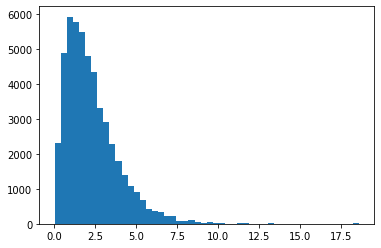

In [64]:
plt.hist(np.array(sim.log["IAT"]), 50)

In [67]:
stats.expon(scale=8)

In [73]:
stats.poisson(1 / (c * rho)), mu=8)

SyntaxError: invalid syntax (<ipython-input-73-8e203efb3b5a>, line 1)

(array([1.0047e+04, 8.1420e+03, 6.5490e+03, 5.1060e+03, 4.0140e+03,
        3.4250e+03, 2.7700e+03, 2.0410e+03, 1.6300e+03, 1.3410e+03,
        9.6100e+02, 8.1600e+02, 6.2600e+02, 4.5600e+02, 4.5300e+02,
        3.4600e+02, 2.6600e+02, 1.8400e+02, 1.9200e+02, 1.2900e+02,
        9.0000e+01, 8.8000e+01, 4.6000e+01, 6.3000e+01, 3.7000e+01,
        4.3000e+01, 2.9000e+01, 2.9000e+01, 2.3000e+01, 1.0000e+01,
        1.1000e+01, 3.0000e+00, 1.0000e+01, 3.0000e+00, 2.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        7.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([5.71052400e-06, 2.29027255e-01, 4.58048799e-01, 6.87070343e-01,
        9.16091887e-01, 1.14511343e+00, 1.37413497e+00, 1.60315652e+00,
        1.83217806e+00, 2.06119961e+00, 2.29022115e+00, 2.51924270e+00,
        2.74826424e+00, 2.97728578e+00, 3.20630733e+00, 3.43532887e+00,
        3.66435042e+00, 3.8933

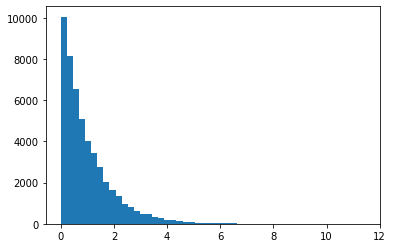

In [65]:
plt.hist(np.array(sim.log["ST"]), 50)

In [ ]:
*** M_M_1_inf_inf_FIFO ***
arrival rate: 8.0000 per hour
service rate: 9.0000 per hour
rho: 0.8889

P_0: probability that there are 0 customers in the system = 0.1111
P_1: probability of 1 customers in the system = 0.0988
P_10: probability of 10 customers in the system = 0.0342

no_q: probability that there is nobody in the queue (P_0+P_1) = 0.2099
util_sys: system utilisation rate  (P_(n>=1)) = 0.8889
util_ser: server utilisation rate (P_(n>=2)) = 0.7901

L_s: the long term average number of customers present in the system = 8.0000
L_q: the long term average number of customers present in the queue = 7.1111
W_s: the long term average waiting time in the system = 1.0000 hour (= 60.0 minutes)
W_q: the long term average waiting time in the queue = 0.8889 hour (= 53.3 minutes)

In [ ]:
average_service_time = np.sum(sim.log["ST"])

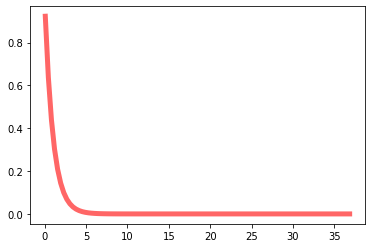

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.expon.ppf(0.01, scale=8),
                 stats.expon.ppf(0.99,scale=8), 100)
ax.plot(x, stats.expon.pdf(x),
        'r-', lw=5, alpha=0.6, label='expon pdf')

In [6]:
/sim.log["c"][-1] - 1

50

In [ ]:
Average_waiting_time = 

In [2]:
c = 20

A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.9)))
S = queueing.service_process("M", stats.expon(0))
q = queueing.queue(A, S, c)

print("Mean waiting time:", q.mean_waiting_time)
print("Delay probability:", q.delay_probability)

Mean waiting time: 0.27538450240805884
Delay probability: 0.5507690048161176


In [14]:
# https://www.win.tue.nl/~iadan/queueing.pdf Page 45, Table 5.1

import numpy as np

customers = [1, 2, 5, 10, 20]
delay_probability = [0.90, 0.85, 0.76, 0.67, 0.55]
mean_waiting_time = [9.00, 4.26, 1.53, 0.67, 0.28]

for i, c in enumerate(customers):

    # Arrival process varies dependent on number of customers
    A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.9)))

    # Mean service time is 1 unit of time
    S = queueing.service_process("M", stats.expon(0))

    # Create queue
    q = queueing.queue(A, S, c)
    
    
    print(q.kendall_notation)
    print("Utilization:      ", .9, q.utilization)
    print("Delay probability:", delay_probability[i], q.delay_probability)
    print("Mean waiting time:", mean_waiting_time[i], q.mean_waiting_time)
    print("")
    


    # Check results
    assert np.isclose(0.9, q.utilization, rtol = 0.1, atol = 0.1)
    assert np.isclose(delay_probability[i], q.delay_probability, rtol = 0.1, atol = 0.1)
    assert np.isclose(mean_waiting_time[i], q.mean_waiting_time, rtol = 0.1, atol = 0.1)

M/M/1/inf/inf/FIFO
Utilization:       0.9 0.8999999999999999
Delay probability: 0.9 0.8999999999999999
Mean waiting time: 9.0 8.999999999999991

M/M/2/inf/inf/FIFO
Utilization:       0.9 0.8999999999999999
Delay probability: 0.85 0.8526315789473683
Mean waiting time: 4.26 4.263157894736838

M/M/5/inf/inf/FIFO
Utilization:       0.9 0.9
Delay probability: 0.76 0.7624932207329357
Mean waiting time: 1.53 1.5249864414658718

M/M/10/inf/inf/FIFO
Utilization:       0.9 0.9
Delay probability: 0.67 0.6687315241076971
Mean waiting time: 0.67 0.6687315241076973

M/M/20/inf/inf/FIFO
Utilization:       0.9 0.9
Delay probability: 0.55 0.5507690048161176
Mean waiting time: 0.28 0.27538450240805884



In [15]:
# https://www.win.tue.nl/~iadan/queueing.pdf Page 45, Table 5.2

import numpy as np

customers = [1, 2, 5, 10, 20]
utilization = [0.90, 0.95, 0.98, 0.99, 0.995]
mean_waiting_time = [9.00, 9.26, 9.50, 9.64, 9.74]
mean_queue_length = [9, 19, 51, 105, 214]

for i, c in enumerate(customers):

    # Arrival process varies dependent on number of customers
    A = queueing.arrival_process("M", stats.poisson(1 / (c * utilization[i])))

    # Mean service time is 1 unit of time
    S = queueing.service_process("M", stats.expon(0))

    # Create queue
    q = queueing.queue(A, S, c)

    # Check results
    print(q.kendall_notation)
    print("Utilization:      ", utilization[i], q.utilization)
    print("Mean queue length:", mean_queue_length[i], q.mean_queue_length)
    print("Mean waiting time:", mean_waiting_time[i], q.mean_waiting_time)
    print("")
    
    
#     assert np.isclose(0.9, q.utilization, rtol = 0.1, atol = 0.1)
#     assert np.isclose(mean_queue_length[i], q.mean_queue_length, rtol = 0.1, atol = 0.1)
#     assert np.isclose(mean_waiting_time[i], q.mean_waiting_time, rtol = 0.2, atol = 0.2)

M/M/1/inf/inf/FIFO
Utilization:       0.9 0.8999999999999999
Mean queue length: 9 8.09999999999999
Mean waiting time: 9.0 8.999999999999991

M/M/2/inf/inf/FIFO
Utilization:       0.95 0.9500000000000001
Mean queue length: 19 17.587179487179515
Mean waiting time: 9.26 9.256410256410271

M/M/5/inf/inf/FIFO
Utilization:       0.98 0.9800000000000001
Mean queue length: 51 46.56552861543942
Mean waiting time: 9.5 9.503169105191718

M/M/10/inf/inf/FIFO
Utilization:       0.99 0.99
Mean queue length: 105 95.41010361837444
Mean waiting time: 9.64 9.637384203876206

M/M/20/inf/inf/FIFO
Utilization:       0.995 0.9949999999999999
Mean queue length: 214 193.77280404516858
Mean waiting time: 9.74 9.737326836440634



In [19]:
# c = customer
# IAT = inter arrival time
# AT = now + IAT
# ST = service time
# TSB = time service begins
# TCWQ = time customer waits in the queue
# TSE = time service ends
# TCSS = time customer spends in the system
# ITS = idle time of the server


# customer, IAT, AT, ST, TSB, TCWQ, TSE, TCSS, ITS

In [31]:
c = 2
A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.95)))
S = queueing.service_process("M", stats.expon(0))

q = queueing.queue(A, S, c)
sim = queueing.simulation(q)

In [24]:
%%time
sim.simulate(50)

Wall time: 85.3 ms


In [25]:
sim.log

{'Time': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 'In queue': [0,
  1,
  0,
  0,
  1,
  6,
  0,
  0,
  0,
  1,
  3,
  2,
  3,
  4,
  4,
  7,
  7,
  7,
  6,
  5,
  4,
  1,
  1,
  4,
  6,
  7,
  10,
  8,
  4,
  6,
  8,
  10,
  12,
  13,
  13,
  15,
  16,
  16,
  13,
  13,
  12,
  13,
  11,
  11,
  9,
  8,
  9,
  2,
  5,
  3],
 'In service': [0,
  2,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 'In system': [0,
  3,
  1,
  1,
  3,
  8,
  2,
  2,
  2,
  3,
  5,
  4,
  5,
  6,
  6,
  9,
  9,
  9,
  8,
  7,
  6,
  3,
  3,
  6,
  8,
  9,
  12,
  10,
  6,

In [ ]:
print("Simulation results:")
sim.get_stats()

print("\n------------------------------------------\n")

print("Analytical solution:")
print("The arrival rate is:      {:04.2f} seconds".format(sim.environment.queue.A.arrival_rate))
print("The mean waiting time is: {:04.2f} seconds".format(sim.environment.queue.mean_waiting_time))
print("The mean service time is: {:04.2f} seconds".format(sim.environment.queue.S.mean_service_time))

In [28]:
import pandas as pd

In [30]:
df=pd.DataFrame(data = sim.log)
df

,Time,In queue,In service,In system
0,0,0,0,0
1,1,1,2,3
2,2,0,1,1
3,3,0,1,1
4,4,1,2,3
5,5,6,2,8
6,6,0,2,2
7,7,0,2,2
8,8,0,2,2
9,9,1,2,3


In [ ]:
stats.poisson(1 / (c * 0.95)).rvs(10)

In [ ]:
import numpy as np
np.mean(stats.expon(0).rvs(10))

In [ ]:
print(np.mean(sim.log["In queue"]))
print(q.mean_queue_length)

In [ ]:
np.max(sim.log["In queue"])

### More complex queues

In [ ]:
c = 1
A = queueing.arrival_process("M", stats.poisson(1 / 0.9))
S = queueing.service_process("M", stats.expon(0))

q = queueing.queue(A, S, c)
print("Utilization:", q.utilization)
print("Mean wait:  ", q.mean_waiting_time)
print("Mean queue: ", q.mean_queue_length)

sim_q = q.mean_waiting_time * (1 / (1 / 0.9))
print("Mean queue: ", sim_q)

In [ ]:
c = 2
A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.95)))
S = queueing.service_process("M", stats.expon(0))

q = queueing.queue(A, S, c)
print("Utilization:", q.utilization)
print("Mean wait:  ", q.mean_waiting_time)
print("Mean queue: ", q.mean_queue_length)

sim_q = q.mean_waiting_time * (1 / (1 / (c * 0.95)))
print("Mean queue: ", sim_q)

In [ ]:
c = 5
A = queueing.arrival_process("M", stats.poisson(1 / (c * 0.98)))
S = queueing.service_process("M", stats.expon(0))

q = queueing.queue(A, S, c)
print("Utilization:", q.utilization)
print("Mean wait:  ", q.mean_waiting_time)
print("Mean queue: ", q.mean_queue_length)

sim_q = q.mean_waiting_time * (1 / (1 / (c * 0.98)))
print("Mean queue: ", sim_q)